In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math

In [2]:
from datetime import datetime, timedelta

df = pd.read_csv('data/orientation_test/AxisPhoneThingyTest_04-05-2023 12-16-38.219.csv', header=None)
df.columns = ['timeStamp',
              'xa','ya','za',
              'verticalAcc','averageHighestAcc','averageLowestAcc',
              'xa_cal','ya_cal','za_cal',
              'xg','yg','zg',
              'currentSpeed','distance',
              'mLocationLat','mLocationLong',
              'mAcc_0','mAcc_1','mAcc_2', #mAcc is in m/s^2 according to android studio
              'mAcc_cal_0','mAcc_cal_1','mAcc_cal_2',
              'mGyr_0','mGyr_1','mGyr_2'] #mGyr is in rad/s according to android studio

df['timeStamp'] = df['timeStamp'].apply(lambda x: datetime.strptime(x, '%H:%M:%S.%f'))

# Calculate the total elapsed time in seconds
total_time = (df['timeStamp'].iloc[-1] - df['timeStamp'].iloc[0]).total_seconds()
print("Total elapsed time: {:.2f} seconds".format(total_time))

# Sampling frequency of Thingy
fs = len(df)/total_time #should be 200 Hz?
print(f'Sample frequency = {fs}')

# Fixing time and time interval of interest
start_time = df['timeStamp'].iloc[0]
df['Time (s)'] = (df['timeStamp'] - start_time).dt.total_seconds()
print(df)

time = df['Time (s)']
time_interval = (time > 0) & (time < 100) #Default
#time_interval = (time > 25) & (time < 35) # Right turn 1
#time_interval = (time > 12.5) & (time < 27.5) # Left turn 1

#TODO: Find time interval where turn occurs -> look at angle
df = df[time_interval]
time = time[time_interval]

#TODO: how to approach stationary measurement? to remove offsets, since it's not really the same as DC offset removal (by using mean)

Total elapsed time: 16.23 seconds
Sample frequency = 192.23898983677242
                   timeStamp        xa        ya        za  verticalAcc  \
0    1900-01-01 12:16:38.238 -0.015625 -0.016602  1.008789     1.002131   
1    1900-01-01 12:16:38.239 -0.011719 -0.025391  1.005859     1.002104   
2    1900-01-01 12:16:38.239 -0.010742 -0.022461  1.000977     1.002126   
3    1900-01-01 12:16:38.240 -0.012695 -0.018555  1.016602     1.002140   
4    1900-01-01 12:16:38.240 -0.005859 -0.019531  0.990234     1.002128   
...                      ...       ...       ...       ...          ...   
3116 1900-01-01 12:16:54.469  0.007812  0.989258  0.003906    -0.012606   
3117 1900-01-01 12:16:54.470  0.006836  0.988281  0.009766    -0.006651   
3118 1900-01-01 12:16:54.471  0.006836  0.993164  0.000977    -0.015566   
3119 1900-01-01 12:16:54.472  0.008789  0.992188  0.005859    -0.010655   
3120 1900-01-01 12:16:54.473  0.009766  0.995117  0.000977    -0.015598   

      averageHighestAcc  av

Sample frequency of mAcc and mGyr = 44.107681882584856 and 48.97431158750693
      Time (s)    mAcc_0    mAcc_1     mAcc_2  mAcc_cal_0  mAcc_cal_1  \
6        0.030  0.226122  0.162712  10.131809   -0.008375    0.002393   
12       0.061  0.240479  0.159123  10.162916    0.005982   -0.001196   
16       0.064  0.248854  0.151944  10.098309    0.014357   -0.008375   
18       0.090  0.232104  0.163908  10.081560   -0.002393    0.003589   
19       0.091  0.239282  0.163908  10.085149    0.004786    0.003589   
...        ...       ...       ...        ...         ...         ...   
3107    16.172 -9.608679  0.168694   1.486840   -9.843176    0.008375   
3109    16.199 -9.547662  0.198604   0.943370   -9.782159    0.038285   
3111    16.201 -9.528519  0.210568   0.783949   -9.763016    0.050249   
3115    16.230 -9.655338  0.125623  -0.037089   -9.889835   -0.034696   
3119    16.234 -9.581161  0.161516   0.038285   -9.815658    0.001196   

      mAcc_cal_2  
6       0.022732  
12      

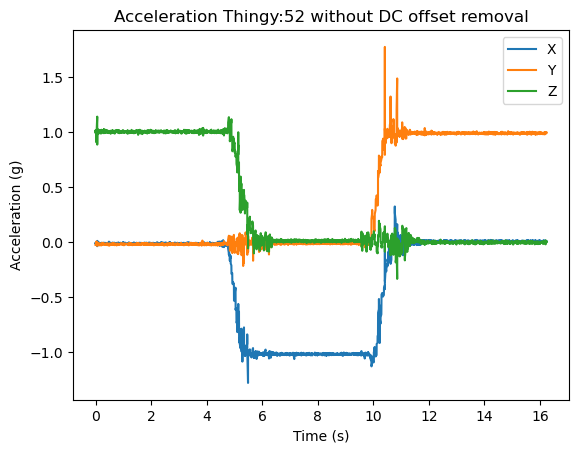

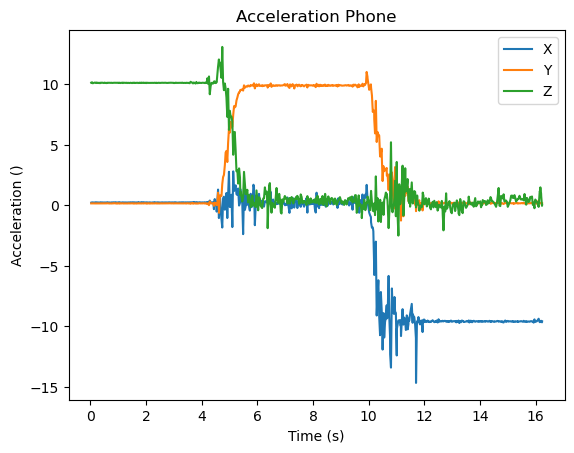

MEASURING SMARTPHONE DATA NOT WORKING :(


In [3]:
# Remove DC offset
acc_x = df['xa']# - np.mean(df['xa'])
acc_y = df['ya']# - np.mean(df['ya'])
acc_z = df['za']# - np.mean(df['za'])
mAcc = df.dropna(subset=['mAcc_0','mAcc_1','mAcc_2','mAcc_cal_0','mAcc_cal_1','mAcc_cal_2'])[['Time (s)', 'mAcc_0','mAcc_1','mAcc_2','mAcc_cal_0','mAcc_cal_1','mAcc_cal_2']]
mGyr = df.dropna(subset=['mGyr_0','mGyr_1','mGyr_2'])[['Time (s)', 'mGyr_0','mGyr_1','mGyr_2']]
# Sampling frequency
fs_phone_acc = len(mAcc)/(mAcc['Time (s)'].iloc[-1] - df['Time (s)'].iloc[0])
fs_phone_gyr = len(mGyr)/(mGyr['Time (s)'].iloc[-1] - df['Time (s)'].iloc[0])

print(f'Sample frequency of mAcc and mGyr = {fs_phone_acc} and {fs_phone_gyr}')

print(mAcc)
#TODO: Noise removal of acceleration so it clearer to visualise -> LPF
#TODO: also noise removal for gyroscope, road vibrations annoying?
#print(mAcc_x)

plt.plot(time, acc_x, label='X')
plt.plot(time, acc_y, label='Y')
plt.plot(time, acc_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration (g)')
plt.title('Acceleration Thingy:52 without DC offset removal')
plt.legend()
plt.show()

plt.plot(mAcc['Time (s)'], mAcc['mAcc_0'], label='X')
plt.plot(mAcc['Time (s)'], mAcc['mAcc_1'], label='Y')
plt.plot(mAcc['Time (s)'], mAcc['mAcc_2'], label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Acceleration ()')
plt.title('Acceleration Phone')
plt.legend()
plt.show()

plt.plot(mAcc['Time (s)'], mAcc['mAcc_cal_0'], label='X')
plt.plot(mAcc['Time (s)'], mAcc['mAcc_cal_1'], label='Y')
plt.plot(mAcc['Time (s)'], mAcc['mAcc_cal_2'], label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Calibrated Acceleration ()')
plt.title('Acceleration Phone Calibrated')
plt.legend()
plt.show()

print('MEASURING SMARTPHONE DATA NOT WORKING :(')
#TODO: Fix smartphone data -> maybe check android studio

0.005729577951308232


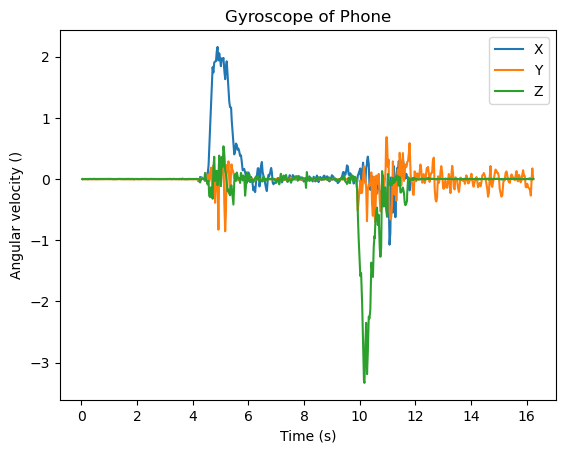

In [4]:
#Convert to deg/s
conv_fac = (180/math.pi)/10000 #rad/s --> deg/s, conversion factor of 180/π ≈ 57.2958 and then a scaling factor of 10000?
#by hand calculation gave: *0.0052, from angle graph
print(conv_fac)

# Don't remove DC offset from this, since it messes with angle
gyr_x = df['xg']*conv_fac
gyr_y = df['yg']*conv_fac
gyr_z = df['zg']*conv_fac

plt.plot(time, gyr_x, label='X')
plt.plot(time, gyr_y, label='Y')
plt.plot(time, gyr_z, label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity (deg/s)')
plt.title('Gyroscope of Thingy:52')
plt.legend()
plt.show()

plt.plot(mGyr['Time (s)'], mGyr['mGyr_0'], label='X')
plt.plot(mGyr['Time (s)'], mGyr['mGyr_1'], label='Y')
plt.plot(mGyr['Time (s)'], mGyr['mGyr_2'], label='Z')
plt.xlabel('Time (s)')
plt.ylabel('Angular velocity ()')
plt.title('Gyroscope of Phone')
plt.legend()
plt.show()

In [5]:
# Compute the cumulative sum of the gyroscope data for each dimension to get the angle
angle_x = np.cumsum(gyr_x) # Direction of bike
angle_y = np.cumsum(gyr_y) # Tilt of bike
angle_z = np.cumsum(gyr_z) # Driving up and downhill
#TODO: ADD SMARTPHONE GYROSCOPE HERE (once possible), might be more clear ngl
pax = np.cumsum(mGyr['mGyr_0'])#phone angle x
pay = np.cumsum(mGyr['mGyr_1'])
paz = np.cumsum(mGyr['mGyr_2'])#phone angle x

#offset = 90/(angle_y.iloc[1500] - angle_y.iloc[100])
#print(offset)

# Plot the angle for each dimension
plt.plot(time, angle_x, label='X')
plt.plot(time, angle_y, label='Y')
plt.plot(time, angle_z, label='Z')

# Add axis labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.title('Angle of Thingy:52')
plt.legend()
plt.show()

# Plot the angle for each dimension
plt.plot(mGyr['Time (s)'], pax, label='X')
plt.plot(mGyr['Time (s)'], pay, label='Y')
plt.plot(mGyr['Time (s)'], paz, label='Z')

# Add axis labels and title
plt.xlabel('Time (s)')
plt.ylabel('Angle (deg)')
plt.title('Angle of Phone')
plt.legend()
plt.show()

print('NEED TO VERIFY UNITS!!')
#TODO: Figure out units -> documentation
#TODO: fix units to get 90 deg turn
#TODO: watch veritasium video about bicycles

NEED TO VERIFY UNITS!!
